In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import work.classifier as wc

from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, method="decision_function", n_jobs=-1)

In [5]:
wc.precisionRecall_check(sgd_clf, X_train, y_train_5)

[[53115  1464]
 [  916  4505]]

precision: 0.7547327860613168
recall:    0.8310274857037447
f1:        0.791044776119403


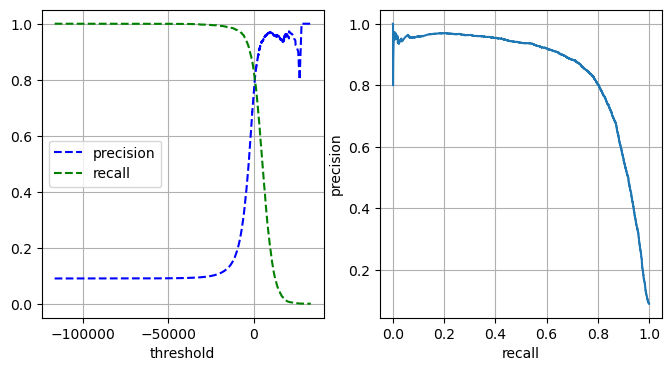

In [6]:
y_s = wc.precisionRecall_curve(sgd_clf, X_train, y_train_5, y_scores)

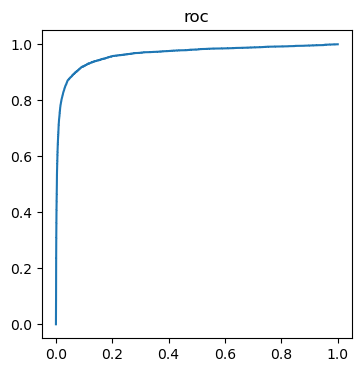

Area under: 0.9648211175804801


In [7]:
wc.recallFallout_curve(sgd_clf, X_train, y_train_5, y_scores)